In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import sympy as sm
from scipy import integrate
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.integrate import odeint


# Question 1 - It is Hopf Bifurcation 

In [4]:
global Rval
def bifurcation(Rval):
    xs, ys, R = sm.symbols('xs, ys, R', negative=False)
    
    Xdot = ys + R*xs                               
    Ydot = -xs + R*ys - (xs**2) * ys
    
    XdotZer = sm.Eq(Xdot, 0)
    YdotZer = sm.Eq(Ydot, 0)

    CriticalPoints = sm.solve( (XdotZer, YdotZer), xs, ys )
    print('Critical points to be examined are %s ' % CriticalPoints)
    CCP = [(0, 0), (-np.sqrt(Rval*(Rval**2 + 1))/Rval, np.sqrt(Rval*(Rval**2 + 1))), (np.sqrt(Rval*(Rval**2 + 1))/Rval, -np.sqrt(Rval*(Rval**2 + 1)))]
    print('For this R value:  %s ' % CCP)
    
    #CriticalPoints = [(0,0)]
    def CheckStability(x,y):
    
        JM = JacobianM.subs([ (xs, x), (ys, y), (R,Rval) ])
        # used float64 to avoid errors dealing with fractions found in previous step
        JM = np.float64(JM)
        Eig = np.linalg.eig(JM)
    
        print('Eigenvalues of (%s, %s) are %s and %s:' %(x, y, Eig[0][0], Eig[0][1]))
    
        if (Eig[0][0].real < 0 and Eig[0][1] < 0):
        
            print('==================> It is sink. Thus, stable')
        
        if (Eig[0][0].real > 0 and Eig[0][1] > 0):
        
            print('==================> It is source. Thus, unstable')
        
        if (Eig[0][0].real > 0 and Eig[0][1] < 0):
        
            print('==================> It is saddle or col. Thus, unstable')
        
        if (Eig[0][0].real < 0 and Eig[0][1] > 0):
        
            print('==================> It is saddle or col. Thus, unstable')
        
        if (Eig[0][0].real == 0 and Eig[0][1] > 0):
        
            print('==================> It is center.') 
        if (Eig[0][0].real == 0 and Eig[0][1] < 0):
        
            print('==================> It is center. ')
        
        print('\n')
        return 
        
    JM2 = sm.Matrix([ Xdot, Ydot ])
    JM3 = sm.Matrix([ xs, ys ])
    JacobianM = JM2.jacobian(JM3)

    print('\n Jacobian %s' % JacobianM)
    print('\n')

    for x,y in CCP:
        if isinstance(x, sm.core.mul.Mul):
            pass
        elif np.isnan(x):
            pass
        else: CheckStability(np.float64(x),np.float64(y))   

    def derivatives(X, t=0):
        # X[0] = x 
        # X[1] = y
        dxdt = X[1] + Rval*X[0]
        dydt = -X[0] + Rval*X[1] - (X[0]**2) * X[1]
        return np.array([ dxdt , dydt ])

    fig, ax = plt.subplots(figsize=(10,7))
    for CP in CCP:
        if isinstance(CP[0], sm.core.mul.Mul):
            pass
        elif np.isnan(CP[0]):
            pass
        else: ax.plot( CP[0],CP[1], "black",  marker = "o",  markersize = 9.0 )


    # First we need to have a grid and then determine the dirction by .
    # The range of x was chosen to allow me see the full interaction between all critical points 
    x = np.linspace(-4, 4, 20)
    y = np.linspace(-4, 4, 20)
    X1 , Y1  = np.meshgrid(x, y)  
    derX1, derY1 = derivatives([X1, Y1])                        
    
    # Normalization of vectors is a good idea to maintain a equal length on the plot. 
    Norm = (np.hypot(derX1, derY1))                        
    Norm[ Norm == 0] = 1.                                
    derX1 /= Norm                                       
    derY1 /= Norm

    ax.quiver(X1, Y1, derX1, derY1, Norm, pivot='mid')
    ax.streamplot(X1, Y1, derX1, derY1, density = 1)

    ts = np.linspace(0, 4, 1000)
    ic = np.linspace(-4, 4, 15)
    for s in ic:
        for r in ic:
            x0 = [r, s]
            xs = odeint(derivatives, x0, ts)
            plt.plot(xs[:, 0], xs[:, 1], 'r-')
    
    
    ax.set_title("Phase Portrait", fontsize=25)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize='20')
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)

    #ax.legend()
    ax.grid("minor") 
    return 

Critical points to be examined are [(0, 0), (-sqrt(R*(R**2 + 1))/R, sqrt(R*(R**2 + 1))), (sqrt(R*(R**2 + 1))/R, -sqrt(R*(R**2 + 1)))] 
For this R value:  [(0, 0), (nan, 0.0), (nan, -0.0)] 

 Jacobian Matrix([[R, 1], [-2*xs*ys - 1, R - xs**2]])


Eigenvalues of (0.0, 0.0) are 1j and -1j:
==================> It is center. 




C:\Users\moath\AppData\Local\Temp\ipykernel_10692\128680582.py:13: RuntimeWarning: invalid value encountered in double_scalars
  CCP = [(0, 0), (-np.sqrt(Rval*(Rval**2 + 1))/Rval, np.sqrt(Rval*(Rval**2 + 1))), (np.sqrt(Rval*(Rval**2 + 1))/Rval, -np.sqrt(Rval*(Rval**2 + 1)))]


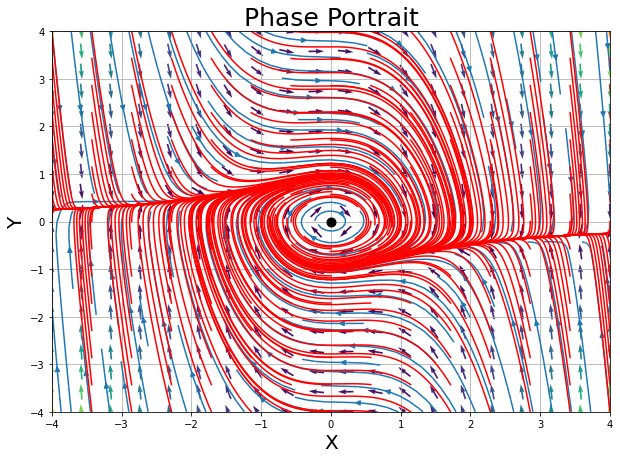

In [9]:
bifurcation(0)

In [10]:
# Change 0.1 below to 1 to change values step to +/- 1 

interact(bifurcation, Rval=(-5,5,0.1));

interactive(children=(FloatSlider(value=0.0, description='Rval', max=5.0, min=-5.0), Output()), _dom_classes=(…

<strong> Below lines are not required, but it is a method to test where the system is stable and unstable using real/imagionary coordinates. If we vary R value and trying to plot where the eigenvalues lie, if it is on the right of plane, then it is stable, if on the left then it is unstable. 
   

In [11]:
xs, ys, R = sm.symbols('xs, ys, R', negative=False)

Xdot = ys + R*xs                                
Ydot = -xs + R*ys - xs**2*ys 

JM2 = sm.Matrix([ Xdot, Ydot ])
JM3 = sm.Matrix([ xs, ys ])
JacobianM = JM2.jacobian(JM3)

JacobianM = JacobianM.subs([ (xs, 0), (ys, 0) ])
JacobianM

Matrix([
[ R, 1],
[-1, R]])

In [12]:
JacobianM.eigenvals()

{R - I: 1, R + I: 1}

# Question 2 - It is Hopf Bifurcation 

In [16]:
def bifurcation(R):
    xs, ys = sm.symbols('xs, ys', negative=False)
  
    Xdot = R*xs + ys - xs**3                               
    Ydot = -xs + R*ys - 2*ys**3
    
    XdotZer = sm.Eq(Xdot, 0)
    YdotZer = sm.Eq(Ydot, 0)

    
    # Due to the complixity of this function, SymPy could not solve it to find where it is zero 
    # But, if we plot the function we see that it never reaches zero, thus, the origin (0,0) is the 
    # only critical point 
    
    CriticalPoints = [(0,0)]
    print('Critical points to be examined are %s ' % CriticalPoints)
    
    def CheckStability(x,y):
    
        JM = JacobianM.subs([ (xs, x), (ys, y) ])
        # used float64 to avoid errors dealing with fractions found in previous step
        JM = np.float64(JM)
        Eig = np.linalg.eig(JM)
    
        print('Eigenvalues of (%s, %s) are %s and %s:' %(x, y, Eig[0][0], Eig[0][1]))
    
        if (Eig[0][0].real < 0 and Eig[0][1] < 0):
        
            print('==================> It is sink. Thus, stable')
        
        if (Eig[0][0].real > 0 and Eig[0][1] > 0):
        
            print('==================> It is source. Thus, unstable')
        
        if (Eig[0][0].real > 0 and Eig[0][1] < 0):
        
            print('==================> It is saddle or col. Thus, unstable')
        
        if (Eig[0][0].real < 0 and Eig[0][1] > 0):
        
            print('==================> It is saddle or col. Thus, unstable')
        
        if (Eig[0][0].real == 0 and Eig[0][1] > 0):
        
            print('==================> It is center.') 
        if (Eig[0][0].real == 0 and Eig[0][1] < 0):
        
            print('==================> It is center. ')
        
        print('\n')
        return 
        
    JM2 = sm.Matrix([ Xdot, Ydot ])
    JM3 = sm.Matrix([ xs, ys ])
    JacobianM = JM2.jacobian(JM3)

    print('\n Jacobian %s' % JacobianM)
    print('\n')

    for x,y in CriticalPoints:
        if isinstance(x, sm.core.mul.Mul):
            pass
        else: CheckStability(np.float64(x),np.float64(y))   

    def derivatives(X, t=0):
        # X[0] = x 
        # X[1] = y
        dxdt = R*X[0] + X[1] - X[0]**3 
        dydt = -X[0] + R*X[1] - 2*X[1]**3
        return np.array([ dxdt , dydt ])

    fig, ax = plt.subplots(figsize=(10,7))
    for CP in CriticalPoints:
        if isinstance(CP[0], sm.core.mul.Mul):
            pass
        else: ax.plot( CP[0],CP[1], "black",  marker = "o",  markersize = 9.0 )


    # First we need to have a grid and then determine the dirction by .
    # The range of x was chosen to allow me see the full interaction between all critical points 
    x = np.linspace(-4, 4, 20)
    y = np.linspace(-4, 4, 20)
    X1 , Y1  = np.meshgrid(x, y)  
    derX1, derY1 = derivatives([X1, Y1])                        
    
    # Normalization of vectors is a good idea to maintain a equal length on the plot. 
    Norm = (np.hypot(derX1, derY1))                        
    Norm[ Norm == 0] = 1.                                
    derX1 /= Norm                                       
    derY1 /= Norm

    ax.quiver(X1, Y1, derX1, derY1, Norm, pivot='mid')
    ax.streamplot(X1, Y1, derX1, derY1, density = 1)

    ts = np.linspace(0, 4, 1000)
    ic = np.linspace(-4, 4, 15)
    for s in ic:
        for r in ic:
            x0 = [r, s]
            xs = odeint(derivatives, x0, ts)
            plt.plot(xs[:, 0], xs[:, 1], 'r-')
    
    
    ax.set_title("Phase Portrait", fontsize=25)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize='20')

    #ax.legend()
    ax.grid("minor")    
    return 

Critical points to be examined are [(0, 0)] 

 Jacobian Matrix([[-3*xs**2, 1], [-1, -6*ys**2]])


Eigenvalues of (0.0, 0.0) are 1j and -1j:
==================> It is center. 




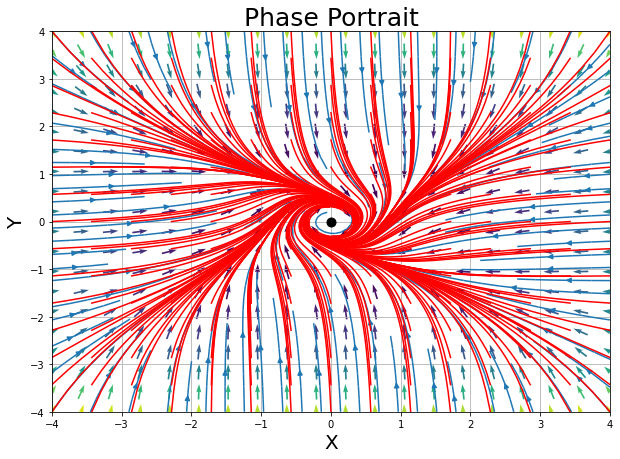

In [17]:
bifurcation(0)

In [19]:
# Change 1 below to 0.1, to have a wide range of options for R value
interact(bifurcation, R=(-5,5,1));

interactive(children=(IntSlider(value=0, description='R', max=5, min=-5), Output()), _dom_classes=('widget-int…

<strong> Explanation for the below code was given in Question 1

In [20]:
xs, ys, R = sm.symbols('xs, ys, R', negative=False)

Xdot = R*xs + ys - xs**3                               
Ydot = -xs + R*ys - 2*ys**3

JM2 = sm.Matrix([ Xdot, Ydot ])
JM3 = sm.Matrix([ xs, ys ])
JacobianM = JM2.jacobian(JM3)

JacobianM = JacobianM.subs([ (xs, 0), (ys, 0) ])
JacobianM

Matrix([
[ R, 1],
[-1, R]])

In [21]:
JacobianM.eigenvals()

{R - I: 1, R + I: 1}

# Question 3 - It is Hopf Bifurcation 

In [22]:
global Rval
def bifurcation(Rval):
    xs, ys, R = sm.symbols('xs, ys, R', negative=False)
    
    Xdot = R*xs + ys - xs**2                               
    Ydot =  -xs + R*ys - 2*(xs**2)
    
    XdotZer = sm.Eq(Xdot, 0)
    YdotZer = sm.Eq(Ydot, 0)

    CriticalPoints = sm.solve( (XdotZer, YdotZer), xs, ys )
    print('Critical points to be examined are %s ' % CriticalPoints)
    
    if Rval == 2:
        CCP = [(0,0)]
    else: CCP = [(0, 0), ((Rval**2 + 1)/(Rval - 2), (2*Rval + 1)*(Rval**2 + 1)/(Rval - 2)**2)]
    
    print('For this R value:  %s ' % CCP)
    
    def CheckStability(x,y):
    
        JM = JacobianM.subs([ (xs, x), (ys, y), (R,Rval) ])
        # used float64 to avoid errors dealing with fractions found in previous step
        JM = np.float64(JM)
        Eig = np.linalg.eig(JM)
    
        print('Eigenvalues of (%s, %s) are %s and %s:' %(x, y, Eig[0][0], Eig[0][1]))
    
        if (Eig[0][0].real < 0 and Eig[0][1] < 0):
        
            print('==================> It is sink. Thus, stable')
        
        if (Eig[0][0].real > 0 and Eig[0][1] > 0):
        
            print('==================> It is source. Thus, unstable')
        
        if (Eig[0][0].real > 0 and Eig[0][1] < 0):
        
            print('==================> It is saddle or col. Thus, unstable')
        
        if (Eig[0][0].real < 0 and Eig[0][1] > 0):
        
            print('==================> It is saddle or col. Thus, unstable')
        
        
        if (Eig[0][0].real == 0 and Eig[0][1] > 0):
        
            print('==================> It is center.') 
        if (Eig[0][0].real == 0 and Eig[0][1] < 0):
        
            print('==================> It is center. ')
        
        print('\n')
        return 
        
    JM2 = sm.Matrix([ Xdot, Ydot ])
    JM3 = sm.Matrix([ xs, ys ])
    JacobianM = JM2.jacobian(JM3)

    print('\n Jacobian %s' % JacobianM)
    print('\n')

    for x,y in CCP:
        if isinstance(x, sm.core.mul.Mul):
            pass
        elif np.isnan(x):
            pass
        else: CheckStability(np.float64(x),np.float64(y))   

    def derivatives(X, t=0):
        # X[0] = x 
        # X[1] = y
        dxdt = Rval*X[0] + X[1] - X[0]**2 
        dydt = -X[0] + Rval*X[1] - 2*(X[0]**2)
        return np.array([ dxdt , dydt ])

    fig, ax = plt.subplots(figsize=(10,7))
    for CP in CCP:
        if isinstance(CP[0], sm.core.mul.Mul):
            pass
        elif np.isnan(CP[0]):
            pass
        else: ax.plot( CP[0],CP[1], "black",  marker = "o",  markersize = 9.0 )


    # First we need to have a grid and then determine the dirction by .
    # The range of x was chosen to allow me see the full interaction between all critical points 
    if Rval == 0:
        xlim = 0.3
        ylim = 0.3 
    else: 
        xlim = 4
        ylim = 4

    x = np.linspace(-xlim, ylim, 20)
    y = np.linspace(-xlim, ylim, 20)
    X1 , Y1  = np.meshgrid(x, y)  
    derX1, derY1 = derivatives([X1, Y1])                        
    
    # Normalization of vectors is a good idea to maintain a equal length on the plot. 
    Norm = (np.hypot(derX1, derY1))                        
    Norm[ Norm == 0] = 1.                                
    derX1 /= Norm                                       
    derY1 /= Norm

    ax.quiver(X1, Y1, derX1, derY1, Norm, pivot='mid')
    ax.streamplot(X1, Y1, derX1, derY1, density = 1)

    #ts = np.linspace(0, 4, 1000)
    #ic = np.linspace(-4, 4, 15)
    #for s in ic:
        #for r in ic:
            #x0 = [s, r]
            #xs = odeint(derivatives, x0, ts)
            #plt.plot(xs[:, 0], xs[:, 1], 'r-')
    
    ax.set_title("Phase Portrait", fontsize=25)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize='20')
    ax.set_xlim(-xlim,ylim)
    ax.set_ylim(-xlim,ylim)

    #ax.legend()
    ax.grid("minor") 
    return 

Critical points to be examined are [(0, 0), ((R**2 + 1)/(R - 2), (2*R + 1)*(R**2 + 1)/(R - 2)**2)] 
For this R value:  [(0, 0), (-0.5, 0.25)] 

 Jacobian Matrix([[R - 2*xs, 1], [-4*xs - 1, R]])


Eigenvalues of (0.0, 0.0) are 1j and -1j:
==================> It is center. 


Eigenvalues of (-0.5, 0.25) are 1.618033988749895 and -0.6180339887498948:
==================> It is saddle or col. Thus, unstable




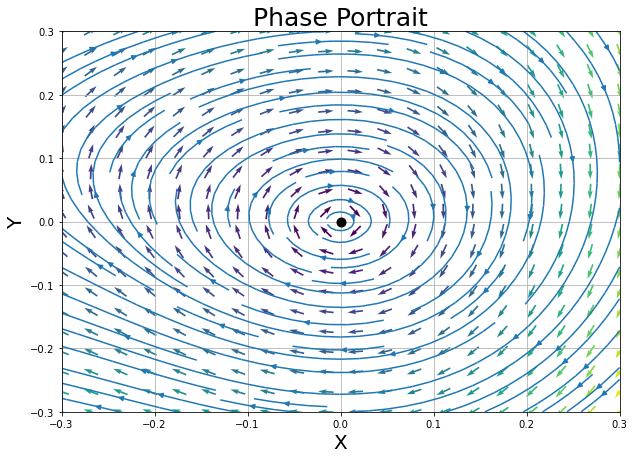

In [23]:
# Test the following values, 
# R = 0 Limit Cycle
# R = 1 LC Vanished 
# R = -1 LC Vanashed as well 

bifurcation(0)

In [24]:
interact(bifurcation, Rval=(-5,5,1));

interactive(children=(IntSlider(value=0, description='Rval', max=5, min=-5), Output()), _dom_classes=('widget-…

# Question 4 - It is Saddle-node Bifurcation

In [25]:
global Rval
def bifurcation(Rval):
    xs, ys, R = sm.symbols('xs, ys, R', negative=False)
    
    Xdot = ys - 2*xs                              
    Ydot = R + xs**2 - ys
    
    XdotZer = sm.Eq(Xdot, 0)
    YdotZer = sm.Eq(Ydot, 0)

    CriticalPoints = sm.solve( (XdotZer, YdotZer), xs, ys )
    print('Critical points to be examined are %s ' % CriticalPoints)
    CCP = [(1 - np.sqrt(1 - Rval), 2 - 2*np.sqrt(1 - Rval)), (np.sqrt(1 - Rval) + 1, 2*np.sqrt(1 - Rval) + 2)]
    print('For this R value:  %s ' % CCP)
    
    def CheckStability(x,y):
    
        JM = JacobianM.subs([ (xs, x), (ys, y), (R,Rval) ])
        # used float64 to avoid errors dealing with fractions found in previous step
        JM = np.float64(JM)
        Eig = np.linalg.eig(JM)
    
        print('Eigenvalues of (%s, %s) are %s and %s:' %(x, y, Eig[0][0], Eig[0][1]))
    
        if (Eig[0][0] < 0 and Eig[0][1] < 0):
        
            print('==================> It is sink. Thus, stable')
        
        if (Eig[0][0] > 0 and Eig[0][1] > 0):
        
            print('==================> It is source. Thus, unstable')
        
        if (Eig[0][0] > 0 and Eig[0][1] < 0):
        
            print('==================> It is saddle or col. Thus, unstable')
        
        if (Eig[0][0] < 0 and Eig[0][1] > 0):
        
            print('==================> It is saddle or col. Thus, unstable')
        
        print('\n')
        return 
        
    JM2 = sm.Matrix([ Xdot, Ydot ])
    JM3 = sm.Matrix([ xs, ys ])
    JacobianM = JM2.jacobian(JM3)

    print('\n Jacobian %s' % JacobianM)
    print('\n')

    for x,y in CCP:
        if isinstance(x, sm.core.mul.Mul):
            pass
        elif np.isnan(x):
            pass
        else: CheckStability(np.float64(x),np.float64(y))   

    def derivatives(X, t=0):
        # X[0] = x 
        # X[1] = y
        dxdt = X[1] - 2*X[0]
        dydt = Rval + X[0]**2 - X[1]
        return np.array([ dxdt , dydt ])

    fig, ax = plt.subplots(figsize=(10,7))
    for CP in CCP:
        if isinstance(CP[0], sm.core.mul.Mul):
            pass
        elif np.isnan(CP[0]):
            pass
        else: ax.plot( CP[0],CP[1], "black",  marker = "o",  markersize = 9.0 )


    # First we need to have a grid and then determine the dirction by .
    # The range of x was chosen to allow me see the full interaction between all critical points 
    x = np.linspace(-4, 4, 20)
    y = np.linspace(-4, 4, 20)
    X1 , Y1  = np.meshgrid(x, y)  
    derX1, derY1 = derivatives([X1, Y1])                        
    
    # Normalization of vectors is a good idea to maintain a equal length on the plot. 
    Norm = (np.hypot(derX1, derY1))                        
    Norm[ Norm == 0] = 1.                                
    derX1 /= Norm                                       
    derY1 /= Norm

    ax.quiver(X1, Y1, derX1, derY1, Norm, pivot='mid')
    ax.streamplot(X1, Y1, derX1, derY1, density = 1)

    #ts = np.linspace(0, 4, 1000)
    #ic = np.linspace(-4, 4, 15)
    #for s in ic:
        #for r in ic:
            #x0 = [r, s]
            #xs = odeint(derivatives, x0, ts)
            #plt.plot(xs[:, 0], xs[:, 1], 'r-')
    
    
    ax.set_title("Phase Portrait", fontsize=25)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize='20')
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)

    #ax.legend()
    ax.grid("minor") 
    return 

Critical points to be examined are [(1 - sqrt(1 - R), 2 - 2*sqrt(1 - R)), (sqrt(1 - R) + 1, 2*sqrt(1 - R) + 2)] 
For this R value:  [(1.0, 2.0), (1.0, 2.0)] 

 Jacobian Matrix([[-2, 1], [2*xs, -1]])


Eigenvalues of (1.0, 2.0) are -3.0 and 0.0:


Eigenvalues of (1.0, 2.0) are -3.0 and 0.0:




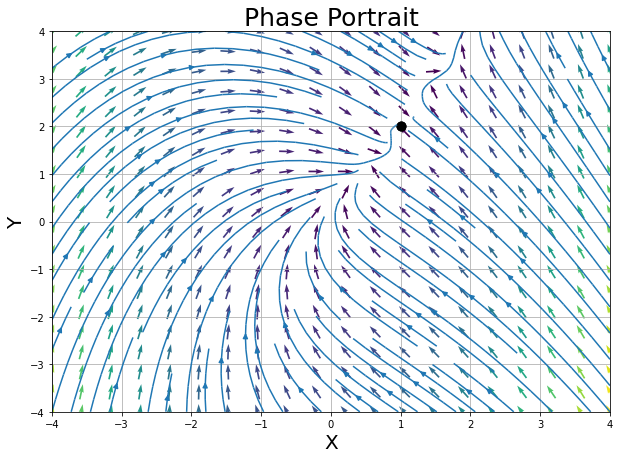

In [26]:
# The Threshold for this problem is R = 1 
# no critical points at R > 1 
# one critical point at R = 1 and it is nonhyperbolic 
# Two critical points at R < 1 

# Test the following values 

# R = 2 you will see nan values which indicates no critical points  
# R = 1   Devise the jacobian, it is for nonhyperbolic form of critical points
# R = -1 Two critical points (Saddle and Node)

bifurcation(1)

In [27]:
interact(bifurcation, Rval=(-5,5,1));

interactive(children=(IntSlider(value=0, description='Rval', max=5, min=-5), Output()), _dom_classes=('widget-…